In [1]:
using CBFToolbox

In [2]:
n = 2
m = 1
f(x) = [-0.6x[1] - x[2], x[1]^3]
g(x) = [0.0, x[2]]
Σ = ControlAffineSystem(n, m, f, g)

ControlAffineSystem(2, 1, f, g, [0.0, 0.0], missing, missing)

In [3]:
V(x) = (1 / 4)x[1]^4 + (1 / 2)x[2]^2
γ(s) = s
CLF = ControlLyapunovFunction(V, γ)

ControlLyapunovFunction(V, CBFToolbox.var"#∇V#16"{typeof(V)}(V), γ)

In [4]:
h(x) = 1 - x[1] - x[2]^2
α(s) = s^3
CBF = ControlBarrierFunction(h, α)

ControlBarrierFunction(h, CBFToolbox.var"#∇h#26"{typeof(h)}(h), α)

In [5]:
κ = CBFQP(Σ, CBF, CLF)

CBFQP(CBFToolbox.var"#control#46"{ControlAffineSystem, ControlBarrierFunction, ControlLyapunovFunction, Float64}(ControlAffineSystem(2, 1, f, g, [0.0, 0.0], missing, missing), ControlBarrierFunction(h, CBFToolbox.var"#∇h#26"{typeof(h)}(h), α), ControlLyapunovFunction(V, CBFToolbox.var"#∇V#16"{typeof(V)}(V), γ), 1000.0))

In [6]:
t0 = 0.0
tf = 10.0
dt = 0.005
sim = Simulation(t0, tf, dt)

Simulation(0.0, 10.0, 0.005, 0.0:0.005:10.0)

In [7]:
Σ.x0 = [-4.0, 1.0]
sim(Σ, κ)

ControlAffineSystem(2, 1, f, g, [-4.0, 1.0], [0.12457998827795422, -0.05990863796784609], [-4.0 -3.992212765231697 … 0.12465426345349015 0.12457998827795422; 1.0 0.6809018726871392 … -0.05992183018285803 -0.05990863796784609])

In [8]:
using Plots
using LaTeXStrings
custom_plots()

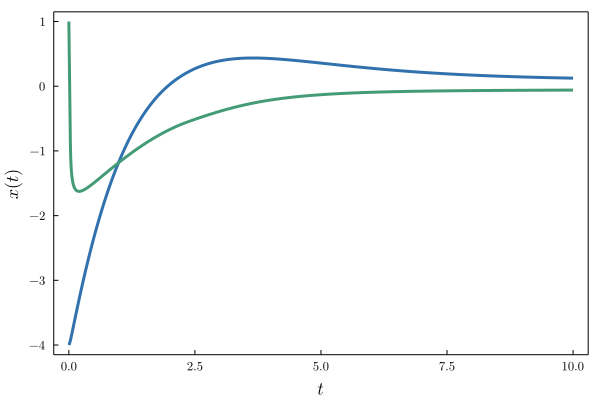

In [9]:
plot(; xlabel=L"t", ylabel=L"x(t)")
plot!(sim.ts, Σ.xs')

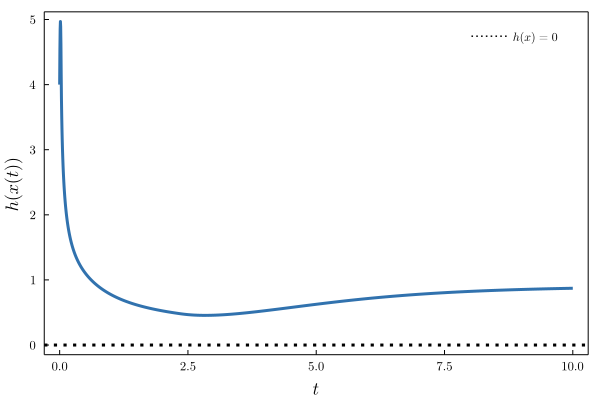

In [10]:
plot(; xlabel=L"t", ylabel=L"h(x(t))")
plot!(sim.ts, [h(Σ.xs[:, i]) for i in 1:length(sim)])
hline!([0.0]; ls=:dot, c=:black, label=L"h(x)=0")

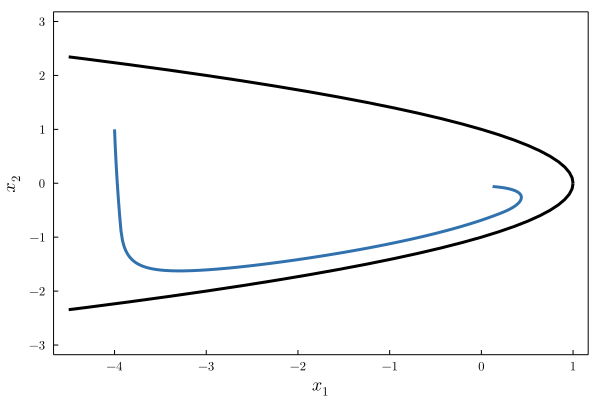

In [11]:
plot(; xlabel=L"x_1", ylabel=L"x_2")
plot!(Σ.xs[1, :], Σ.xs[2, :])
h(x1, x2) = 1 - x1 - x2^2
contour!(-4.5:0.1:1, -3:0.1:3, h; levels=[0.0], colorbar=false, c=:black)